This code was used to generate figures for the paper *The impact of explicit local dynamics on range expansions driven by long-range dispersal*. Cells below figures will show the number of simulations that went into averages as appropriate. The local carrying capacity was called $K$ in the paper but is often labeled as `max_num` below.

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
%load_ext rpy2.ipython

# Figure 1: Time-doubling hierarchy

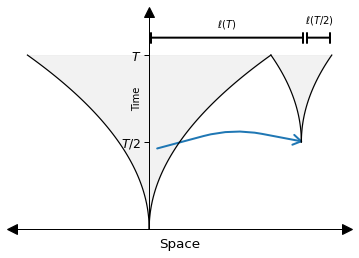

In [2]:
# the core of the colony:
powr = 2
full_time = 100
tvals = np.linspace(0, full_time, 100)
lvals = tvals**powr

# and the satellite:
sat_tvals = np.linspace(0, full_time/2, 100)
sat_lvals = sat_tvals**powr 

with sns.plotting_context('paper', font_scale=1.4):
    fig, ax = plt.subplots()
    ax.plot(lvals, tvals, c='k')
    ax.plot(-lvals, tvals, c='k')
    ax.fill_betweenx(y=tvals, x1=lvals, x2=-lvals, color='k', alpha=0.05)

    ax.plot(sat_lvals + full_time**powr * (1.25), sat_tvals + full_time/2, c='k')
    ax.plot(-sat_lvals + full_time**powr * (1.25), sat_tvals + full_time/2, c='k')
    ax.fill_betweenx(y=sat_tvals + full_time/2, x1=sat_lvals + full_time**powr * (1.25), 
                     x2=-sat_lvals + full_time**powr * (1.25), color='k', alpha=0.05)

    ax.set(xticks=[], xlabel='Space', yticks=[full_time/2, full_time], yticklabels=[r'$T/2$', r'$T$'])
    ax.set_ylim(0, 125)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    sns.despine()

    ax.plot((1), (0), ls="", marker=">", ms=10, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="<", ms=10, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

    ax.text(-1000, 75, 'Time', va='center', ha='center', rotation=90)

    arrow = FancyArrowPatch(posA=(500, full_time/2 - 4), posB=(full_time**powr * (1.28), full_time/2), 
                            arrowstyle='->, head_length=8, head_width=5', 
                            connectionstyle='arc, angleA=15, angleB=-15, armA=80, armB=0, rad=30',
                            color='C0', linewidth=2)
    ax.add_patch(arrow)

    ell_arrow = FancyArrowPatch(posA=(0, full_time*1.1), posB=(full_time**powr * (1.28), full_time*1.1),
                                arrowstyle='|-|, widthA=5, widthB=5', linewidth=2)
    ax.add_patch(ell_arrow)
    ax.text((full_time**powr * (1.28))/2, full_time*1.18, r'$\ell(T)$', ha='center', va='center')

    ell_arrow2 = FancyArrowPatch(posA=(full_time**powr * (1.28), full_time*1.1), 
                                 posB=(sat_lvals[-1] + full_time**powr * (1.25), full_time*1.1),
                                 arrowstyle='|-|, widthA=5, widthB=5', linewidth=2)
    ax.add_patch(ell_arrow2)
    ax.text(sat_lvals[-1] + full_time**powr * (1.25) - 1000, full_time*1.2, r'$\ell(T/2)$', ha='center', va='center');


# Figure 2: Spatial patterns

We generated this data by running three simulations in the SLiM GUI, one with each kernel exponent included in the figure. We recorded the spatial data at the end of each simulation and joined (i.e. `pd.merge()`-ed) that data frame with the corresponding `pop_data.txt` file in order to add the column with the population size (`num_individuals`) for selecting which individuals could be plotted in each panel; we then concatenated the three joined data frames to form the large data frame we read in below. Having two columns that keep track of time (`birth gen` and `generation`) is an artifact of the join operation.

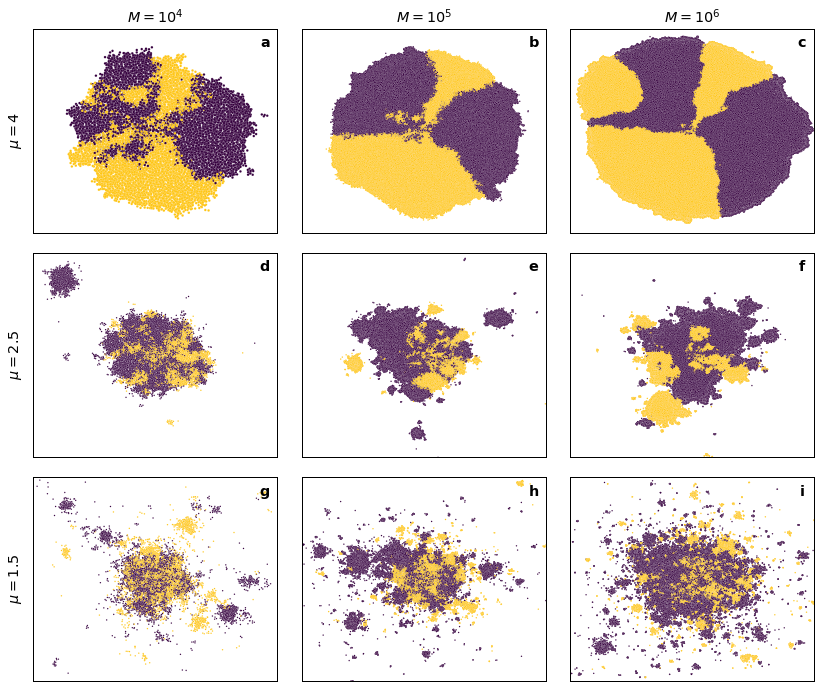

In [3]:
data = pd.read_csv('data/spatial_patterns.csv.gz')

colordict = {False: 'xkcd:deep purple', True: 'xkcd:golden yellow'}
mus = [4, 2.5, 1.5]
pop_sizes = [1e4, 1e5, 1e6]
lims = {(1.5, 1e4): 80, (1.5, 1e5): 350, (1.5, 1e6): 1000,
        (2.5, 1e4): 80, (2.5, 1e5): 250, (2.5, 1e6): 700,
        (4, 1e4): 45, (4, 1e5): 130, (4, 1e6): 350}

labels = list(map(chr, range(97, 106)))

with sns.plotting_context('paper', font_scale=1.25):
    fig, axs = plt.subplots(3, 3, figsize=(14, 12))
    for row, mu in enumerate(mus):
        for col, pop in enumerate(pop_sizes):
            sel = (data.mu == mu) & (data.num_individuals <= pop) 
            if np.sum(sel) > 0:
    #             if pop > 1e4: # show the size of the previous plot window?
    #                 axs[row, col].hlines(y=[-lim, lim], xmin=-lim, xmax=lim, colors='magenta')
    #                 axs[row, col].vlines(x=[-lim, lim], ymin=-lim, ymax=lim, colors='magenta')

                lim = lims[(mu, pop)]
                ms = 6 if ((mu == 4) and (pop == 1e4)) else 2
                sns.scatterplot(data=data[sel], x='x', y='y', hue='mutation', s=ms, linewidth=0.1, palette=colordict, legend=False, 
                                ax=axs[row, col])
                axs[row, col].set(xlim=(-lim, lim), ylim=(-lim, lim), xlabel='', ylabel='', xticks=[], yticks=[])

    [ax.text(0.95, 0.93, lab, transform=ax.transAxes, fontweight='bold', fontsize='large', ha='center', va='center') \
     for lab, ax in zip(labels, axs.flatten())]
    [ax.set_ylabel(rf'$\mu = {mu}$', fontsize='large') for mu, ax in zip(mus, axs[:, 0].flatten())];
    [ax.set_title(rf'$M = 10^{int(np.log10(p))}$', fontsize='large') for p, ax in zip(pop_sizes, axs[0, :].flatten())];
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Figure 3: Density regulation and jump kernel

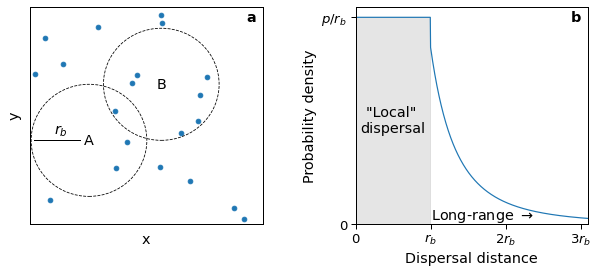

In [4]:
mu = 2
p = 0.7
r = 1
xs = np.linspace(0, 4*r, 1000)
jkvals = np.zeros_like(xs)
unif = xs <= r
jkvals[unif] = p / r
jkvals[~unif] = ((1 - p) / r**(-mu)) * mu * xs[~unif]**(-(mu + 1))

spatial = pd.read_csv('data/spatial.txt')

with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    Apos = (-1, -0.5)
    circ0 = plt.Circle(Apos, radius=1, fill=False, ls='--', color='k')
    Bpos = (0.25, 0.5)
    circ1 = plt.Circle(Bpos, radius=1, fill=False, ls='--', color='k')
    
    axs[0].scatter(spatial.x, spatial.y)
    axs[0].set(xlabel='x', ylabel='y', xlim=(-2*r - 0.02, 2*r), ylim=(-2*r, 2*r - 0.12), xticks=[], yticks=[])
    axs[0].add_patch(circ0);
    axs[0].text(*Apos, 'A', ha='center', va='center')
    axs[0].plot([Apos[0]-0.95, Apos[0]-0.15], [Apos[1], Apos[1]], 'k', lw=1)
    axs[0].text(Apos[0] - 0.6, Apos[1] + 0.1, r'$r_b$')
    axs[0].add_patch(circ1)
    axs[0].text(*Bpos, 'B', ha='center', va='center');
    axs[0].text(0.95, 0.95, 'a', transform=axs[0].transAxes, weight='bold', ha='center', va='center')


    axs[1].plot(xs, jkvals)
    axs[1].set(xlabel='Dispersal distance', ylabel='Probability density',
               xticks=[0, r, 2*r, 3*r], xticklabels=['0', r'$r_b$', r'$2r_b$', r'3$r_b$'],
               yticks=[0, p/r], yticklabels=['0', r'$p/r_b$'])
    axs[1].fill_between(xs[unif], jkvals[unif], color='k', alpha=0.1)
    axs[1].set_ylim(bottom=0)
    axs[1].set_xlim(0, 3.1*r)
    axs[1].text(r/2, p/2, '"Local" \ndispersal', ha='center', va='center')
    axs[1].text(1.01*r, 0.0, r'Long-range $\rightarrow$', ha='left', va='bottom')
    axs[1].text(0.95, 0.95, 'b', transform=axs[1].transAxes, fontweight='bold', va='center', ha='center');
        
    fig.subplots_adjust(wspace=0.4)

# Figure 4: Local logistic growth around pioneers

The averaged data for panels a and b was collected using `logistic_data.py`. The fits to individual interaction regions which went into panel c were made using `all_logistic_fits.py`.

In [5]:
# bring in the averaged data
df = pd.read_csv('data/logistic_data.csv')
df['avg_saturation'] = df.avg_occupancy / df.capacity
df['$p$'] = df.loc[:, 'percent_local'] / 100
df['$\mu$'] = df.loc[:, 'mu']
df = df.astype({'capacity':int})

# and the data from individual fits
indiv_logistic = pd.read_csv('data/indiv_logistic_fits.csv')

In [6]:
%%R -i indiv_logistic -o summary
suppressMessages(library(tidyverse))

summary <- indiv_logistic %>% 
  filter(capacity < 5*max_num, R2 > 0.8) %>% 
  group_by(max_num, mu, percentage) %>% 
  summarize(avg_rate = mean(rate), sd_rate = sd(rate),
            avg_capacity = mean(capacity), sd_capacity = sd(capacity),
            avg_tsat = mean(t_sat), sd_tsat = sd(t_sat),
            number = n()) %>%
  mutate(p = percentage / 100)


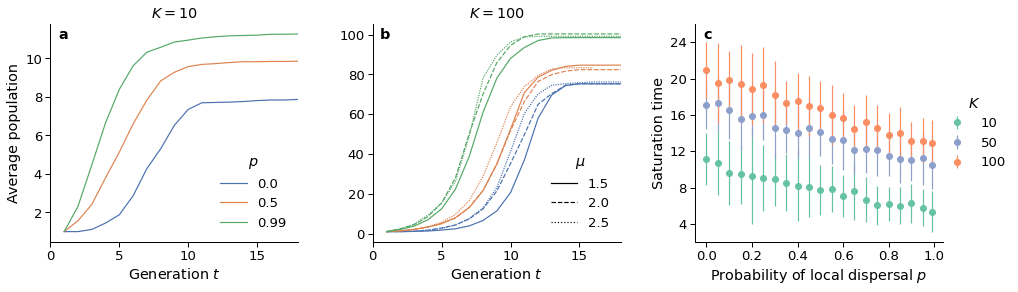

In [7]:
caps = [10, 100, 100]
lets = ['a', 'b', 'c']
deep = sns.color_palette('deep')
pal = sns.color_palette('Set2')

with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))
    sel = (df.mu == 1.5) & (df.capacity == 10)
    sns.lineplot(data=df[sel], x='time', y='avg_occupancy', hue='$p$', palette='deep', legend=None, ax=axs[0])
    axs[0].set_ylabel('Average population')
    axs[0].set_title(rf'$K=10$')
    
    colored_lines = [mlines.Line2D([], [], c=deep[0], label='0.0'),
                     mlines.Line2D([], [], c=deep[1], label='0.5'),
                     mlines.Line2D([], [], c=deep[2], label='0.99')]
    axs[0].legend(handles=colored_lines, loc='lower right', title=r'$p$', frameon=False)
    
    
    sns.lineplot(data=df[df.capacity == 100], x='time', y='avg_occupancy', style='$\mu$', hue='$p$',
                 palette='deep', ax=axs[1])
    axs[1].set_ylabel('')
    axs[1].set_title(rf'$K=100$')
    
    styles = [mlines.Line2D([], [], c='k', ls='-', label='1.5'),
              mlines.Line2D([], [], c='k', ls='--', label='2.0'),
              mlines.Line2D([], [], c='k', ls=':', label='2.5')]
    axs[1].legend(handles=styles, loc='lower right', title=r'$\mu$', frameon=False)
    
    
    for ax in axs[:2]:
        ax.set_xlim(0, 18)
        ax.set_xlabel('Generation $t$')
        ax.set_xticks([0, 5, 10, 15])

    for i, K in enumerate([10, 50, 100]):
        # for keeping consistent color scheme
        if i == 0: c_i = 0
        elif i == 1: c_i = 2
        elif i == 2: c_i = 1
            
        data = summary[(summary.max_num == K) & (summary.mu == 1.5)]
        axs[2].errorbar(data.p, data.avg_tsat, yerr=data.sd_tsat, fmt='o', ls='', ms=6,
                     label=f'{K}', mfc=pal[c_i], mec=pal[c_i], ecolor=pal[c_i])
    
    axs[2].legend(title=r'$K$', loc='center right', bbox_to_anchor=(1.3, 0.5), frameon=False)
    axs[2].set_xlabel(r'Probability of local dispersal $p$')
    axs[2].set_ylabel('Saturation time')
    axs[2].set_ylim(top=26)
    axs[2].set_yticks(np.arange(4, 25, 4))
    

    for i, ax in enumerate(axs):
        ax.text(0.05, 0.95, f'{lets[i]}', transform=ax.transAxes, fontweight='bold', va='center', ha='center')

    sns.despine(fig=fig)
    fig.subplots_adjust(wspace=0.3);


Number of interaction regions for panels a and b:

In [8]:
%%R -i df
suppressMessages(library(dplyr))

df %>% 
  filter(mu == 1.5 | capacity == 100) %>%
  group_by(capacity, mu, percent_local) %>%
  summarize(N_regions = unique(N_satellites)) 

# A tibble: 12 x 4
# Groups:   capacity, mu [?]
   capacity    mu percent_local N_regions
      <int> <dbl>         <dbl>     <dbl>
 1       10   1.5             0        63
 2       10   1.5            50        71
 3       10   1.5            99        62
 4      100   1.5             0        66
 5      100   1.5            50        57
 6      100   1.5            99        55
 7      100   2               0        52
 8      100   2              50        53
 9      100   2              99        25
10      100   2.5             0        55
11      100   2.5            50        59
12      100   2.5            99        10


Numbers of interaction regions for panel c:

In [9]:
cols = ['max_num', 'mu', 'percentage', 'number']
summary.loc[summary.mu == 1.5, cols]

,max_num,mu,percentage,number
22,10,1.5,0,60
23,10,1.5,5,50
24,10,1.5,10,53
25,10,1.5,15,57
26,10,1.5,20,52
...,...,...,...,...
205,100,1.5,80,60
206,100,1.5,85,55
207,100,1.5,90,57
208,100,1.5,95,56


In [10]:
used = np.array(summary[summary.mu == 1.5].number)
print(f'mean number of interaction regions: {np.mean(used):.2f}')
print(f'sd number of interaction regions: {np.std(used):.2f}')

mean number of interaction regions: 55.81
sd number of interaction regions: 10.21


# Figure 5: Local heterozygosity around pioneers

This data collected using `compile_hets.py`.

/Users/nathanvilliger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


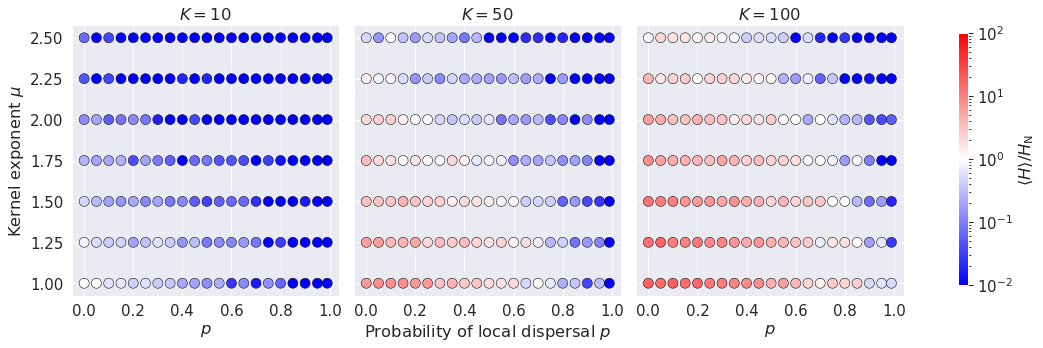

In [11]:
local_hets = pd.read_csv('data/local_hets.csv', comment='#')
local_hets.normed[np.isclose(local_hets.normed, 0)] = 1e-10
local_hets['Probability of local dispersal $p$'] = local_hets['percent local'] / 100

norm = colors.LogNorm(vmin=10**-2, vmax=10**2)
with sns.plotting_context(context='paper', font_scale=1.7):
    with sns.axes_style('darkgrid'):
        g = sns.relplot(data=local_hets, x='Probability of local dispersal $p$', y='$\mu$', hue='normed', 
                        hue_norm=norm, col='max_num', palette='bwr', height=5, aspect=1, legend=False, s=100, 
                        edgecolor='k', linewidth=0.5);
        g.set_ylabels('Kernel exponent $\mu$')
        g.set_titles(col_template='$K = {col_name}$')
        g.fig.subplots_adjust(right=0.85, top=0.87, bottom=0.12, left=0.08)
        cbar_ax = g.fig.add_axes([0.9, 0.15, 0.01, 0.7])
        g.fig.colorbar(mappable=ScalarMappable(norm=norm, cmap='bwr'), cax=cbar_ax, 
                       label=r'$\langle H \rangle / H_\mathrm{N}$');
        for ax in g.axes.flatten():
            ax.set_yticks(np.unique(local_hets['$\mu$']))
        g.axes[0,0].set_xlabel(r'$p$')
        g.axes[0,2].set_xlabel(r'$p$')


Here's how many interaction regions went into each average:

In [12]:
local_hets.groupby('max_num')['num. satellites'].aggregate(['mean', 'std'])

,mean,std
max_num,,
10,51.639456,14.023926
50,54.863946,9.157405
100,58.136054,11.571481


Typically just over 50. 

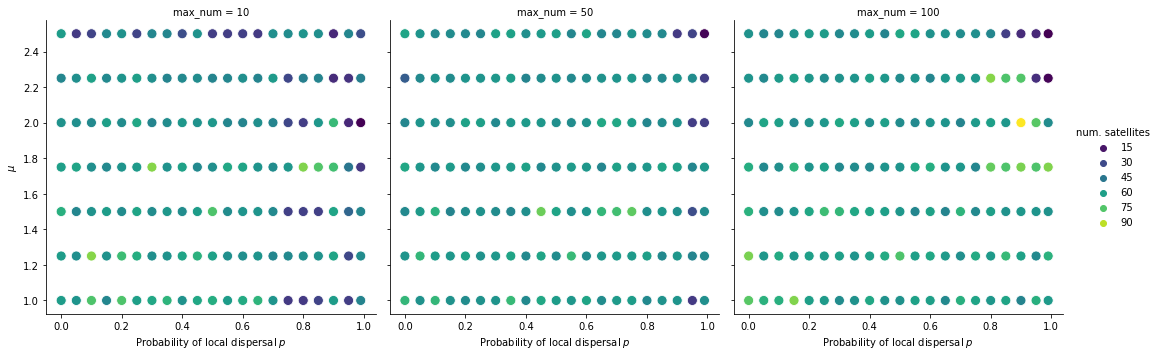

In [13]:
sns.relplot(data=local_hets, x='Probability of local dispersal $p$', y='$\mu$', hue='num. satellites', 
            col='max_num', s=100, palette='viridis');

# Figure 6: Average growth curves at low $K$

Computed using `mean_growth_curves.py`.

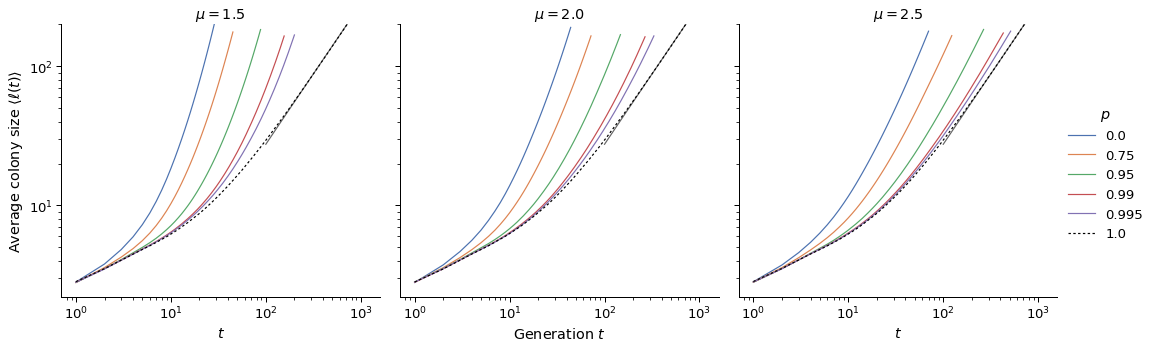

In [14]:
avg_curves = pd.read_csv('data/avg_growth_curves.csv', comment='#')
avg_curves['$p$'] = avg_curves.percent_local / 100

# fit to linear growth at end of sims with all local dispersal - doesn't depend on mu if 100% short-range dispersal
all_local = avg_curves[(avg_curves.percent_local == 100) & (avg_curves.mu == 1.5) & (avg_curves.gen >= 1e2)]
fit = np.polyfit(all_local.gen, all_local.avg_ell, deg=1)

deep = sns.color_palette('deep')
pal = [deep[i] for i in range(5)] + ['k']
styledict = {0: '', 0.75:'', 0.95:'', 0.99:'', 0.995:'', 1:(2, 2)}
plotfit = True
if plotfit: ts = np.linspace(1e2, all_local.gen.max(), 100)

with sns.plotting_context('paper', font_scale=1.5):
    g = sns.relplot(data=avg_curves[avg_curves.max_num == 10], x='gen', y='avg_ell', col='mu', hue='$p$', palette=pal, 
                    kind='line', facet_kws={'sharex':False}, style='$p$', dashes=styledict)
    g.set_titles(col_template='$\mu = {col_name}$')
    g.axes[0,0].set_ylabel(r'Average colony size $\langle \ell(t) \rangle$')
    for ax in g.axes.flatten():
        ax.set_yscale('log')
        ax.set_xlabel(r'$t$')
        ax.set_xscale('log')
        ax.set_ylim(top=200)
        if plotfit: ax.plot(ts, fit[0] * ts + fit[1], 'k', alpha=0.6);
    g.axes[0,1].set_xlabel(r'Generation $t$')


In [15]:
cols = ['max_num', 'mu', '$p$', 'N_sims']
avg_curves.loc[(avg_curves.gen == 1) & (avg_curves.max_num == 10), cols]

,max_num,mu,$p$,N_sims
0,10.0,1.5,0.000,241.0
29,10.0,1.5,0.750,241.0
74,10.0,1.5,0.950,241.0
162,10.0,1.5,0.990,241.0
318,10.0,1.5,0.995,241.0
518,10.0,1.5,1.000,51.0
1637,10.0,2.0,0.000,241.0
1681,10.0,2.0,0.750,241.0
1753,10.0,2.0,0.950,241.0
1900,10.0,2.0,0.990,241.0


# Figure 7: Testing the consistency condition at $\mu=2$

*Note: My initial method of selecting data points and plotting for the consistency condition was not the most clear, but I'll show it here since that's what led to the figures in the paper. A better way is shown at the end of this notebook. <br> -NV*

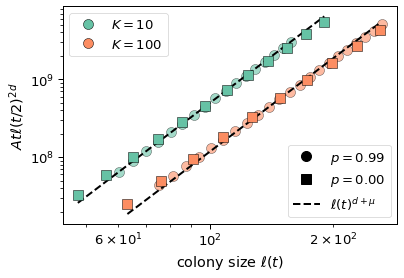

In [16]:
curves = pd.read_csv('data/avg_growth_curves.csv', comment='#')

mus = [2.0]
ps = [99, 0]
max_nums = [10, 100]

with sns.plotting_context('paper', font_scale=1.5):
    fig, ax = plt.subplots(figsize=(6, 4))
    consts = []
    for r, p in enumerate(ps):
        for i, max_num in enumerate(max_nums):
            scale_const = 1
            mstyle = 'o'
            if p == 0:
                mstyle = 's'
                if max_num == 10: scale_const = 24 
                elif max_num == 100: scale_const = 15
            
            for mu in mus:
                sizes = np.array(curves.loc[(curves.max_num == max_num) & (curves.mu == mu) & (curves.percent_local == p), 'avg_ell'])
                times = np.array(curves.loc[(curves.max_num == max_num) & (curves.mu == mu) & (curves.percent_local == p), 'gen'])

                even_gens = (times % 2 == 0)
                later = (times >= times.max()/2)
                later_even_times = np.array(times[even_gens & later], dtype=int)
                whole_args = even_gens & later

                half_times = np.array(later_even_times / 2, dtype=int)
                half_args = np.squeeze(np.concatenate([np.argwhere(times == half_time) for half_time in half_times]))

                xvals = sizes[whole_args]
                yvals = (later_even_times * sizes[half_args]**4)
                
                if p == 99: 
                    sel = np.zeros_like(xvals, dtype=bool)
                    if max_num == 10: sel[::4] = True 
                    elif max_num == 100: sel[::2] = True
                elif p == 0:
                    sel = np.ones_like(xvals, dtype=bool)
                    ax.loglog(xvals[sel], consts[i] * xvals[sel]**((1) * (2 + mu)), '--', c='k', lw=2)
                    
                ax.loglog(xvals[sel], scale_const * yvals[sel], mstyle, label=rf'$N_c={max_num}$' if p==99 else '', 
                          markersize=10, alpha=0.6 if p == 99 else 1, 
                          c=sns.color_palette('Set2')[i], mec='k' if p==0 else 'k', mew=0.5)

                if p == 99:
                    fit_const = lambda xs, A: np.log10(A) + np.log10(xs**((1) * (2+mu)))
                    const = curve_fit(fit_const, xvals, np.log10(yvals))[0]
                    consts.append(const)

    ax.set(xlabel=r'colony size $\ell(t)$', ylabel=r'$At\ell(t/2)^{2d}$')

    blacks = [mlines.Line2D([], [], ls='', marker='o', markersize=10, c='k', label=r'$p=0.99$'),
              mlines.Line2D([], [], ls='', marker='s', markersize=10, c='k', label=r'$p=0.00$'),
              mlines.Line2D([], [], ls='--', lw=2, c='k', label=r'$\ell(t)^{d+\mu}$')]
    leg1 = ax.legend(handles=blacks, loc='lower right')
    
    color_points = [mlines.Line2D([], [], ls='', marker='o', markersize=10, c=sns.color_palette('Set2')[0], 
                            label=r'$K=10$', mec='k', mew=0.5),
                    mlines.Line2D([], [], ls='', marker='o', markersize=10, c=sns.color_palette('Set2')[1], 
                            label=r'$K=100$', mec='k', mew=0.5)]
    ax.legend(handles=color_points, loc='upper left')
    ax.add_artist(leg1);


In [17]:
cols = ['max_num', 'mu', 'percent_local', 'N_sims']
curves.loc[(curves.gen == 1) & (curves.mu == 2) & ((curves.percent_local == 0) | (curves.percent_local == 99)), cols]

,max_num,mu,percent_local,N_sims
1637,10.0,2.0,0.0,241.0
1900,10.0,2.0,99.0,241.0
6474,100.0,2.0,0.0,151.0
6670,100.0,2.0,99.0,133.0


# Figure 8: Estimating kernel exponent using consistency condition

Apply this method to all simulations individually using `indiv_consistencies.py`.

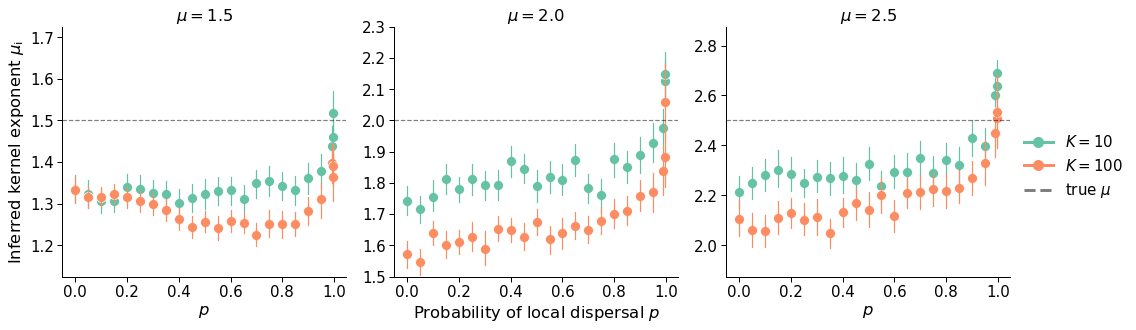

In [18]:
indivs = pd.read_csv('data/indiv_consistencies.csv')
indivs['Probability of local dispersal $p$'] = indivs.percent_local / 100

mus = [1.5, 2.0, 2.5]
fac = 0.25
with sns.plotting_context('paper', font_scale=1.7):
    g = sns.relplot(data=indivs, x='Probability of local dispersal $p$', y='inferred', col='mu', hue='max_num', 
                    kind='line', lw=0, marker='o', ms=10, estimator='mean', ci=95, n_boot=1000, err_style='bars', 
                    palette='Set2', facet_kws={'sharey':False}, legend=False)
    g.set_titles(col_template='$\mu = {col_name}$')
    for ax, mu in zip(g.axes.flatten(), mus):
        ax.set_ylim(mu * (0.75), mu * (1.15))
        ax.axhline(y=mu, c='k', ls='--', alpha=0.5, label='true kernel exponent')

    for ax in g.axes[0, [0, 2]]:
        ax.set_xlabel(r'$p$')
        
    g.set_ylabels(r'Inferred kernel exponent $\mu_\mathrm{i}$')
    g.fig.subplots_adjust(top=0.86, right=0.95)
    
    hands = []
    for i in range(3):
        if i == 0: lab = '$K = 10$'
        elif i == 1: lab = '$K = 100$'
        else: lab = 'true $\mu$'
        hands.append(mlines.Line2D([], [], ls='--' if i==2 else '-', c='k' if i==2 else sns.color_palette('Set2')[i],
                                   label=lab, alpha=0.5 if i==2 else 1, lw=3, marker='' if i==2 else 'o', ms=10))
    g.fig.legend(handles=hands, loc='upper left', bbox_to_anchor=(0.95, 0.6), frameon=False);

Number of simulations in each average:

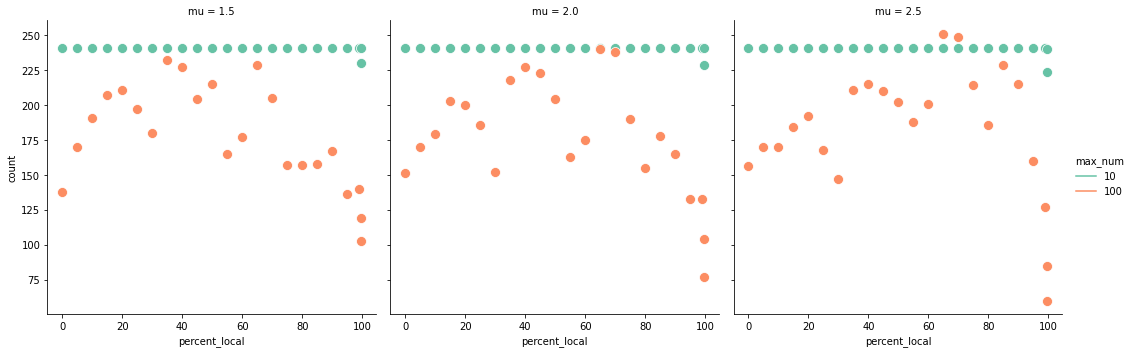

In [19]:
counts = indivs.drop(columns='Probability of local dispersal $p$').groupby(['max_num', 'mu', 'percent_local']).count()\
         .reset_index().rename(columns={'inferred':'count'})

sns.relplot(data=counts, x='percent_local', y='count', col='mu', hue='max_num', 
            kind='line', estimator='mean', ci=None, lw=0, marker='o', ms=10, palette='Set2', 
            legend='full');

# Figure 9: Evolution of global heterozygosity 

Collected using `het_trajectory.py`.

In [20]:
data = pd.read_csv('data/het_trajectories.csv').astype({'capacity': int})
caps = np.char.add(np.repeat('K = ', repeats=len(data)), np.array(data.capacity, dtype=str))
ps = np.char.add(np.repeat(', p = ', repeats=len(data)), np.array(data.percent_local / 100, dtype=str))
pars = np.char.add(caps, ps)
data['pars'] = pars

In [21]:
%%R -i data -o panela,panelb,panelc
suppressMessages(library(dplyr))

panela <- data %>%
  filter(capacity == 10, percent_local == 50) %>%
  group_by(mu, generation) %>%
  summarize(count = n(),
            mean_pop_size = mean(num_individuals),
            mean_het = mean(pop_heterozygosity),
            sem_het = sd(pop_heterozygosity) / sqrt(count),
            upper_sem = mean_het + sem_het,
            lower_sem = mean_het - sem_het) %>%
  mutate(rel_pop_size = mean_pop_size / mean_pop_size[1]) %>%
  filter(count == max(count))
    
panelb <- data %>%
  filter(capacity == 100, percent_local == 0, mu < 4) %>%
  group_by(mu, percent_local, generation) %>%
  summarize(count = n(),
            mean_pop_size = mean(num_individuals),
            mean_het = mean(pop_heterozygosity),
            sem_het = sd(pop_heterozygosity) / sqrt(count),
            upper_sem = mean_het + sem_het,
            lower_sem = mean_het - sem_het) %>%
  filter(count == max(count)) %>%
  mutate(rel_pop_size = mean_pop_size / mean_pop_size[1])  
    
panelc <- data %>%
  filter(mu == 2.5, (capacity == 100) | (percent_local == 50)) %>%
  group_by(pars, generation) %>% 
  summarise(count = n(),
            mean_pop_size = mean(num_individuals),
            mean_het = mean(pop_heterozygosity),
            sem_het = sd(pop_heterozygosity) / sqrt(count),
            upper_sem = mean_het + sem_het,
            lower_sem = mean_het - sem_het) %>%
  filter(count == max(count)) %>% 
  mutate(rel_pop_size = mean_pop_size / mean_pop_size[1]) %>% 
  filter(rel_pop_size < 1e4)

In [22]:
panelc['pars'] = panelc['pars'].astype('category')
panelc['pars'].cat.reorder_categories(['K = 10, p = 0.5', 'K = 100, p = 0.8', 
                                       'K = 100, p = 0.5', 'K = 100, p = 0.0'],
                                       inplace=True)

/Users/nathanvilliger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  after removing the cwd from sys.path.


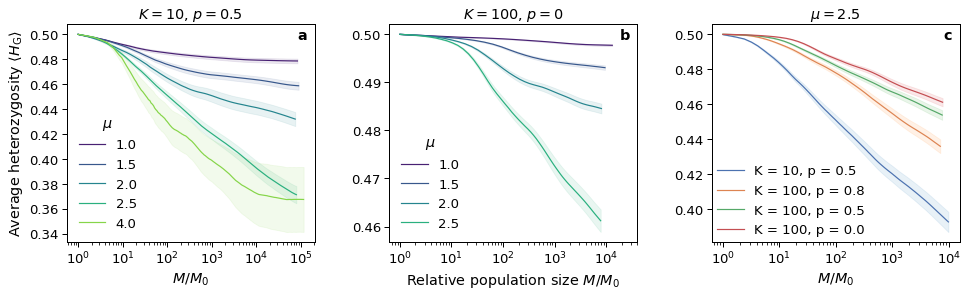

In [23]:
pal = sns.color_palette('viridis', n_colors=10)[:9:2]
with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    
    sns.lineplot(data=panela, x='rel_pop_size', y='mean_het', hue='mu', palette=pal, ax=axs[0], legend='auto')
    for i, mu in enumerate(np.unique(panela.mu)):
        sel = panela.mu == mu
        axs[0].fill_between(panela[sel].rel_pop_size, y1=panela[sel].upper_sem, y2=panela[sel].lower_sem, color=pal[i], alpha=0.1)
    axs[0].set(xscale='log', xlabel=r'$M/M_0$', ylabel=r'Average heterozygosity $\langle H_\mathrm{G} \rangle$')
    axs[0].legend(title=r'$\mu$', loc='lower left', frameon=False)
    axs[0].set_title(r'$K=10$, $p=0.5$')
    axs[0].text(0.95, 0.95, 'a', transform=axs[0].transAxes, weight='bold', ha='center', va='center')

    sns.lineplot(data=panelb, x='rel_pop_size', y='mean_het', hue='mu', palette=pal[:4], ax=axs[1])
    for i, mu in enumerate(np.unique(panelb.mu)):
        sel = panelb.mu == mu
        axs[1].fill_between(panelb[sel].rel_pop_size, y1=panelb[sel].upper_sem, y2=panelb[sel].lower_sem, color=pal[i], alpha=0.1)
        
    axs[1].set(xscale='log', xlabel=r'Relative population size $M/M_0$', ylabel='')
    axs[1].legend(title=r'$\mu$', loc='lower left', frameon=False)
    axs[1].set_title(r'$K=100$, $p=0$')
    axs[1].set_yticks(np.arange(0.46, 0.51, 0.01))
    axs[1].text(0.95, 0.95, 'b', transform=axs[1].transAxes, weight='bold', ha='center', va='center')
    axs[1].set_xlim(right=4e4)

    cats = panelc.pars.cat.categories
    sns.lineplot(data=panelc, x='rel_pop_size', y='mean_het', hue='pars', palette='deep', ax=axs[2])
    for i, cat in enumerate(cats):
        sel = panelc.pars == cat
        axs[2].fill_between(panelc[sel].rel_pop_size, y1=panelc[sel].upper_sem, y2=panelc[sel].lower_sem, color=f'C{i}', alpha=0.1)
    axs[2].set(xscale='log', xlabel=r'$M/M_0$', ylabel='')
    axs[2].legend(title=None, frameon=False, loc='lower left', bbox_to_anchor=(-0.025, -0.03))
    axs[2].set_title(r'$\mu=2.5$')
    axs[2].text(0.95, 0.95, 'c', transform=axs[2].transAxes, fontweight='bold', va='center', ha='center');

    fig.subplots_adjust(wspace=0.3)

In [24]:
panela.loc[panela.generation == 1, ['mu', 'count']]

,mu,count
1,1.0,237
35,1.5,251
93,2.0,210
200,2.5,414
429,4.0,24


In [25]:
panelb.loc[panelb.generation == 1, ['mu', 'count']]

,mu,count
1,1.0,400
22,1.5,400
50,2.0,400
90,2.5,401


In [26]:
panelc.loc[panelc.generation == 1, ['pars', 'count']]

,pars,count
1,"K = 10, p = 0.5",414
124,"K = 100, p = 0.0",401
186,"K = 100, p = 0.5",400
263,"K = 100, p = 0.8",396


# Figure 10: Space doesn't saturate to $\rho$ 

In [27]:
def compute_distances(test_pos_array, pos_array, text=False):
    '''
    Compute distances from each position in test_pos_array to all the individual positions in pos_array. 
    Count how many individuals are within a distance of 1 (density regulation radius) from each test position.
    Inputs: test_pos_array- array of (x,y) test position coordinates (shape (N,2))
            pos_array- array of (x,y) positions of the individuals in the population
    
    Returns a horizontally stacked array where the first two elements in a row are the test position and the third
    is the number of individuals within a distance of 1 from that position.
    '''
    N_interacting = np.zeros((test_pos_array.shape[0], 1))
    for t, test_pos in enumerate(test_pos_array):
        distances = np.zeros(pos_array.shape[0])
        for i in range(pos_array.shape[0]):
            ind_pos = pos_array[i]
            distances[i] = np.sqrt((test_pos[0] - ind_pos[0])**2 + (test_pos[1] - ind_pos[1])**2)

        N_interacting[t] = np.sum(distances <= 1)
        if text: print('There are {} individuals within distance 1 of the test position'.format(N_interacting[t]))
    
    return np.hstack([test_pos_array, N_interacting])

Shift x and y positions slightly since these individuals came from simulations where I didn't do the density regulation in the first generation for the population centered at (0, 0).

In [28]:
spatial = pd.read_csv('data/central_inds10.txt')
spatial.loc[:, ['x', 'y']] += 2
sel = (np.abs(spatial.x) < 5) & (np.abs(spatial.y) < 5)
pos_array = np.array(spatial.loc[sel, ['x', 'y']])

neighbors = compute_distances(np.random.uniform(-1.6, 1.6, size=(10000,2)), pos_array)

In [29]:
spatial100 = pd.read_csv('data/central_inds100.txt')
spatial100.loc[:, ['x', 'y']] += 2
sel = (np.abs(spatial100.x) < 5) & (np.abs(spatial100.y) < 5)
pos100 = np.array(spatial100.loc[sel, ['x', 'y']])

neighbors100 = compute_distances(np.random.uniform(-1.5, 1.5, size=(10000,2)), pos100)

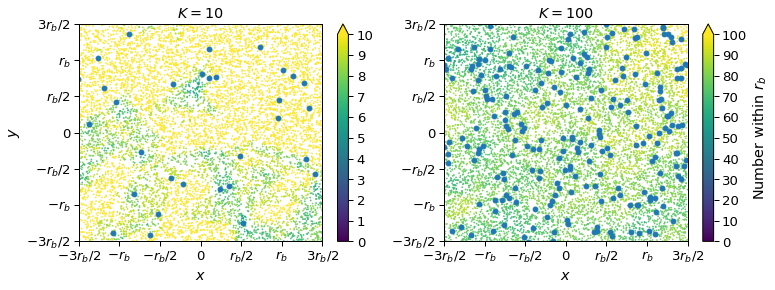

In [30]:
ticks = np.arange(-1.5, 1.51, 0.5)
labs = [r'$-3r_b/2$', r'$-r_b$', r'$-r_b/2$', '0', r'$r_b/2$', r'$r_b$', r'$3r_b/2$']
lim = 1.5

with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    norm10 = colors.Normalize(vmin=0, vmax=10)
    axs[0].plot(pos_array[:,0], pos_array[:,1], 'o')
    axs[0].scatter(neighbors[:,0], neighbors[:,1], c=neighbors[:,2], norm=norm10, alpha=0.8, s=1)
    axs[0].set_title(r'$K=10$')
    fig.colorbar(ScalarMappable(norm=norm10), ax=axs[0], ticks=list(range(11)), extend='max');

    norm100 = colors.Normalize(vmin=0, vmax=100)
    axs[1].plot(pos100[:,0], pos100[:,1], 'o')
    axs[1].scatter(neighbors100[:,0], neighbors100[:,1], c=neighbors100[:,2], norm=norm100, alpha=0.8, s=1)
    axs[1].set_title(r'$K=100$')
    fig.colorbar(ScalarMappable(norm=norm100), ax=axs[1], ticks=list(range(0, 101, 10)), extend='max',
                 label=r'Number within $r_b$');

    for ax in axs:
        ax.set(xlabel=r'$x$', ylabel=r'$y$', xticks=ticks, xticklabels=labs, yticks=ticks, yticklabels=labs,
               xlim=(-lim, lim), ylim=(-lim, lim))
    axs[1].set_ylabel('');


# Figure 11: Average growth curves at high $K$

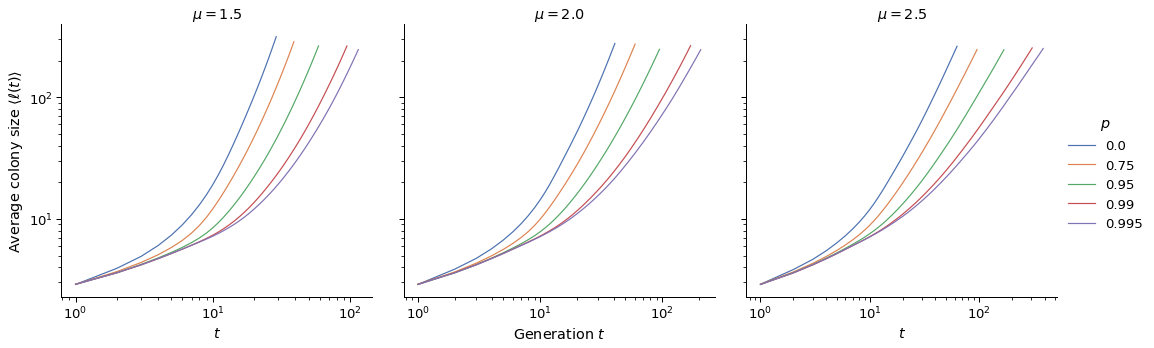

In [31]:
with sns.plotting_context('paper', font_scale=1.5):
    g = sns.relplot(data=avg_curves[avg_curves.max_num == 100], x='gen', y='avg_ell', col='mu', hue='$p$', kind='line', 
                    palette='deep', facet_kws={'sharex':False});
    g.set_titles(col_template='$\mu = {col_name}$')
    g.axes[0,0].set_ylabel(r'Average colony size $\langle \ell(t) \rangle$')
    for ax in g.axes.flatten():
        ax.set_yscale('log')
        ax.set_xlabel(r'$t$')
        ax.set_xscale('log')
    g.axes[0,1].set_xlabel(r'Generation $t$');

In [32]:
cols = ['max_num', 'mu', '$p$', 'N_sims']
avg_curves.loc[(avg_curves.gen == 1) & (avg_curves.max_num == 100), cols]

,max_num,mu,$p$,N_sims
6137,100.0,1.5,0.000,138.0
6166,100.0,1.5,0.750,157.0
6205,100.0,1.5,0.950,136.0
6264,100.0,1.5,0.990,140.0
6359,100.0,1.5,0.995,119.0
6474,100.0,2.0,0.000,151.0
6515,100.0,2.0,0.750,190.0
6575,100.0,2.0,0.950,133.0
6670,100.0,2.0,0.990,133.0
6841,100.0,2.0,0.995,104.0


# Figure 12: Consistency condition plots with data from all time steps

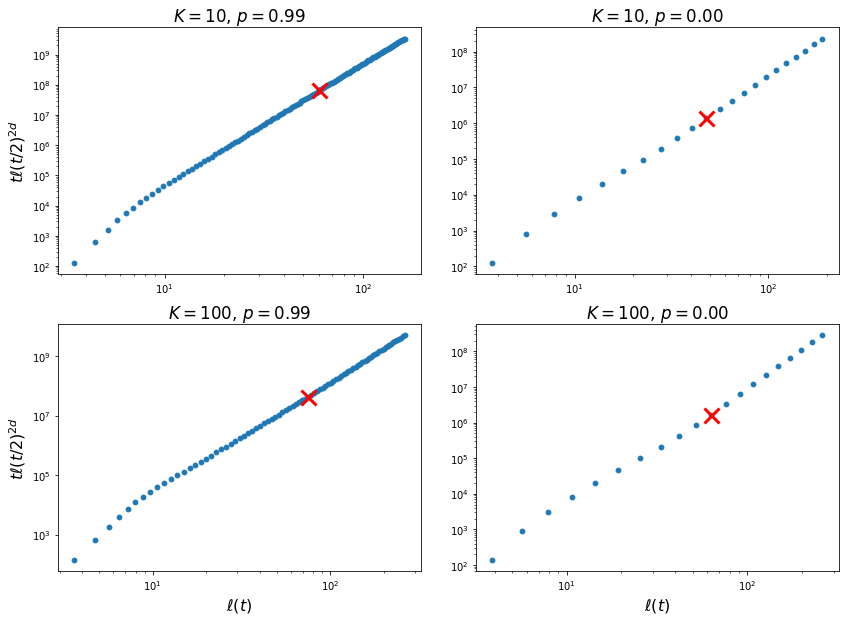

In [33]:
parsets = [(10, 2.0, 99), (10, 2.0, 0), (100, 2.0, 99), (100, 2.0, 0)]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
with sns.plotting_context('paper', font_scale=1.75):
    for i, pars in enumerate(parsets):
        ax = axs.flatten()[i]

        sizes = np.array(curves.loc[(curves.max_num == pars[0]) & (curves.mu == pars[1]) & (curves.percent_local == pars[2]), 'avg_ell'])
        times = np.array(curves.loc[(curves.max_num == pars[0]) & (curves.mu == pars[1]) & (curves.percent_local == pars[2]), 'gen'])

        even_gens = (times % 2 == 0)
        later = np.ones_like(even_gens, dtype=bool)
        later_even_times = np.array(times[even_gens & later], dtype=int)
        whole_args = even_gens & later

        half_times = np.array(later_even_times / 2, dtype=int)
        half_args = np.squeeze(np.concatenate([np.argwhere(times == half_time) for half_time in half_times]))

        xvals = sizes[whole_args]
        yvals = (later_even_times * sizes[half_args]**4)

        ax.loglog(xvals, yvals, 'o', label='all the points')

        even_gens = (times % 2 == 0)
        later = (times >= times.max()/2)
        later_even_times = np.array(times[even_gens & later], dtype=int)
        whole_args = even_gens & later

        half_times = np.array(later_even_times / 2, dtype=int)
        half_args = np.squeeze(np.concatenate([np.argwhere(times == half_time) for half_time in half_times]))

        xvals = sizes[whole_args]
        yvals = (later_even_times * sizes[half_args]**4)

        ax.plot(xvals[0], yvals[0], 'xr', ms=15, mew=3, label='the first point we used \nin consistency condition')
        ax.set_title(rf'$K={pars[0]}$, $p={pars[2]/100 :.2f}$')

    [ax.set_xlabel(r'$\ell(t)$', fontsize=16) for ax in axs[1, :]]
    [ax.set_ylabel(r'$t\ell(t/2)^{2d}$', fontsize=16) for ax in axs[:, 0]]
    fig.subplots_adjust(hspace=0.2, wspace=0.15)

In [34]:
cols = ['max_num', 'mu', 'percent_local', 'N_sims']
curves.loc[(curves.gen == 1) & (curves.mu == 2) & ((curves.percent_local == 0) | (curves.percent_local == 99)), cols]

,max_num,mu,percent_local,N_sims
1637,10.0,2.0,0.0,241.0
1900,10.0,2.0,99.0,241.0
6474,100.0,2.0,0.0,151.0
6670,100.0,2.0,99.0,133.0


# Figure 13: Consistency condition at exponents of 1.5 and 2.5

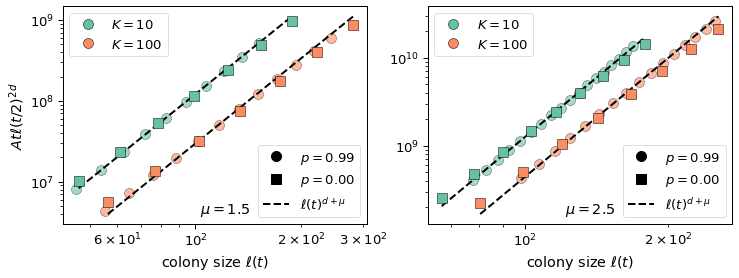

In [35]:
mus = [1.5, 2.5]
ps = [99, 0]
max_nums = [10, 100]

with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for ax, mu in zip(axs, mus):
        consts = []
        for r, p in enumerate(ps):
            for i, max_num in enumerate(max_nums):
                scale_const = 1
                mstyle = 'o'
                if p == 0:
                    mstyle = 's'
                    if mu == 1.5:
                        if max_num == 10: scale_const = 23 
                        elif max_num == 100: scale_const = 12
                    elif mu == 2.5:
                        if max_num == 10: scale_const = 17 
                        elif max_num == 100: scale_const = 16
            
            
                sizes = np.array(curves.loc[(curves.max_num == max_num) & (curves.mu == mu) & (curves.percent_local == p), 'avg_ell'])
                times = np.array(curves.loc[(curves.max_num == max_num) & (curves.mu == mu) & (curves.percent_local == p), 'gen'])

                even_gens = (times % 2 == 0)
                later = (times >= times.max()/2)
                later_even_times = np.array(times[even_gens & later], dtype=int)
                whole_args = even_gens & later

                half_times = np.array(later_even_times / 2, dtype=int)
                half_args = np.squeeze(np.concatenate([np.argwhere(times == half_time) for half_time in half_times]))

                xvals = sizes[whole_args]
                yvals = (later_even_times * sizes[half_args]**4)
                
                if p == 99: 
                    sel = np.zeros_like(xvals, dtype=bool)
                    if mu == 1.5:
                        if max_num == 10: sel[::4] = True 
                        elif max_num == 100: sel[::2] = True
                    elif mu == 2.5:
                        if max_num == 10: sel[::6] = True 
                        elif max_num == 100: sel[::5] = True
                            
                elif p == 0:
                    sel = np.ones_like(xvals, dtype=bool)
                    if mu == 2.5: sel[::2] = False 

                    ax.loglog(xvals[sel], consts[i] * xvals[sel]**((1) * (2 + mu)), '--', c='k', lw=2)
                    
                ax.loglog(xvals[sel], scale_const * yvals[sel], mstyle, label=rf'$N_c={max_num}$' if p==99 else '', 
                          markersize=10, alpha=0.6 if p == 99 else 1, 
                          c=sns.color_palette('Set2')[i], mec='k' if p==0 else 'k', mew=0.5)

                if p == 99:
                    fit_const = lambda xs, A: np.log10(A) + np.log10(xs**((1) * (2+mu)))
                    const = curve_fit(fit_const, xvals, np.log10(yvals))[0]
                    consts.append(const)

        ax.set(xlabel=r'colony size $\ell(t)$')

        blacks = [mlines.Line2D([], [], ls='', marker='o', markersize=10, c='k', label=r'$p=0.99$'),
                  mlines.Line2D([], [], ls='', marker='s', markersize=10, c='k', label=r'$p=0.00$'),
                  mlines.Line2D([], [], ls='--', lw=2, c='k', label=r'$\ell(t)^{d+\mu}$')]
        leg1 = ax.legend(handles=blacks, loc='lower right')

        color_points = [mlines.Line2D([], [], ls='', marker='o', markersize=10, c=sns.color_palette('Set2')[0], 
                                label=r'$K=10$', mec='k', mew=0.5),
                        mlines.Line2D([], [], ls='', marker='o', markersize=10, c=sns.color_palette('Set2')[1], 
                                label=r'$K=100$', mec='k', mew=0.5)]
        ax.legend(handles=color_points, loc='upper left')
        ax.add_artist(leg1);
        ax.text(0.45, 0.05, rf'$\mu={mu}$', transform=ax.transAxes)
    axs[0].set_ylabel(r'$At\ell(t/2)^{2d}$')

In [36]:
cols = ['max_num', 'mu', 'percent_local', 'N_sims']
curves.loc[(curves.gen == 1) & (curves.mu != 2) & ((curves.percent_local == 0) | (curves.percent_local == 99)), cols]

,max_num,mu,percent_local,N_sims
0,10.0,1.5,0.0,241.0
162,10.0,1.5,99.0,241.0
3617,10.0,2.5,0.0,241.0
4076,10.0,2.5,99.0,241.0
6137,100.0,1.5,0.0,138.0
6264,100.0,1.5,99.0,140.0
7048,100.0,2.5,0.0,156.0
7376,100.0,2.5,99.0,127.0


# Figure 14: Fitted logistic growth parameters

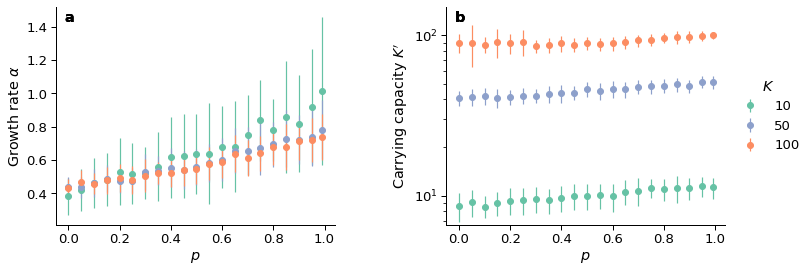

In [37]:
mu = 1.5
pal = sns.color_palette('Set2')
lets = ['a', 'b']

with sns.plotting_context('paper', font_scale=1.5):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    for i, K in enumerate([10, 50, 100]):
        if i == 0: c_i = 0
        elif i == 1: c_i = 2
        elif i == 2: c_i = 1
            
        data = summary[(summary.max_num == K) & (summary.mu == mu)]
        axs[0].errorbar(data.p, data.avg_rate, yerr=data.sd_rate, fmt='o', ls='', ms=6,
                        label=f'{K}', mfc=pal[c_i], mec=pal[c_i], ecolor=pal[c_i])
        axs[0].set(xlabel=r'$p$', ylabel=r'Growth rate $\alpha$')

        axs[1].errorbar(data.p, data.avg_capacity, yerr=data.sd_capacity, fmt='o', ls='', ms=6,
                        label=f'{K}', mfc=pal[c_i], mec=pal[c_i], ecolor=pal[c_i])
        axs[1].set(xlabel=r'$p$', ylabel=r'Carrying capacity $K^\prime$')
        axs[1].set_yscale('log')
        axs[1].set_ylim(top=150)
        axs[1].legend(title=r'$K$', loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

        for i, ax in enumerate(axs):
            ax.text(0.05, 0.95, f'{lets[i]}', transform=ax.transAxes, fontweight='bold', va='center', ha='center')

        fig.subplots_adjust(wspace=0.4)
        sns.despine(fig=fig)

---

Cleaner/clearer method of selecting data for the consistency condition plots: make a tidy data frame with descriptive column names. Include times and half times as a built in check that the correct data is being selected.

In [38]:
def collect_curves(capacities=[10, 100], percents_local=[0, 99], mus=[1.5, 2.0, 2.5]):
    '''
    Collect data from the average growth curves into one convenient data frame for plotting and other analysis. 
    Assumes the data frame `curves` has been read in above.
    
    Inputs: capacities- LIST of local carrying capacities
            percents_local- LIST of percentages of local dispersal
            mus- LIST of kernel exponents
            
    Returns: a data frame with all relevant data and parameters, and one computed quantity - the right hand side
             of the consistency condition (t \ell(t/2)^(2d))
    '''
    cols = ['time', 'size', 'half time', 'size (half time)', '$K$', '$\mu$', '$p$']
    all_collected = pd.DataFrame(columns=cols)
    for cap in capacities:
        for p in percents_local:
            for mu in mus:
                sizes = np.array(curves.loc[(curves.max_num == cap) & (curves.mu == mu) & (curves.percent_local == p), 'avg_ell'])
                times = np.array(curves.loc[(curves.max_num == cap) & (curves.mu == mu) & (curves.percent_local == p), 'gen'])
                df = pd.DataFrame(data=np.stack([times, sizes], axis=1), columns=['time', 'size'])
                
                full = df[(df.time % 2 == 0) & (df.time >= np.max(df.time) / 2)].copy()

                tf = np.zeros_like(df.time, dtype=bool)
                for i, time in enumerate(df.time):
                    if np.any(time * 2 == full.time): tf[i] = True

                half = df[tf].copy().rename(columns={'time':'half time', 'size':'size (half time)'})

                collected = pd.concat([full.reset_index(drop=True), half.reset_index(drop=True)], axis=1)
                collected['$K$'] = cap
                collected['$\mu$'] = mu
                collected['$p$'] = p
                all_collected = all_collected.append(collected, ignore_index=True)
     
    all_collected['RHS'] = all_collected['time'] * all_collected['size (half time)']**4
    all_collected = all_collected[['$K$', '$\mu$', '$p$', 'time', 'size', 'half time', 'size (half time)', 'RHS']]
    return all_collected

In [39]:
cleaner = collect_curves()
print(f"T/F: all half times are actually half of the corresponding times? {np.all(cleaner['time'] == 2 * cleaner['half time'])}")
cleaner

T/F: all half times are actually half of the corresponding times? True


,$K$,$\mu$,$p$,time,size,half time,size (half time),RHS
0,10,1.5,0,16.0,46.516172,8.0,12.869320,4.388765e+05
1,10,1.5,0,18.0,60.807463,9.0,15.445649,1.024465e+06
2,10,1.5,0,20.0,78.149144,10.0,18.439366,2.312139e+06
3,10,1.5,0,22.0,99.006798,11.0,21.852454,5.016763e+06
4,10,1.5,0,24.0,123.926610,12.0,25.729370,1.051787e+07
...,...,...,...,...,...,...,...,...
423,100,2.5,99,298.0,244.066646,149.0,94.089877,2.335543e+10
424,100,2.5,99,300.0,246.412551,150.0,94.909411,2.434212e+10
425,100,2.5,99,302.0,248.766528,151.0,95.731090,2.536407e+10
426,100,2.5,99,304.0,251.124787,152.0,96.556498,2.642406e+10
